In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

## Labelling Data

In [2]:
train = pd.read_csv('adult_data.csv',names =["age","work_class","fnlwgt","education",
                                             "education_num","marital-status","occupation",
                                             "relationship","race","sex","capital_gain","capital_loss",
                                             "hours_per_week","native_country","income"]
)

In [3]:
test = pd.read_csv('adult_data.csv',names =["age","work_class","fnlwgt","education"
,"education_num","marital-status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]
)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Pre-Processing

## Checking for Null Values

In [5]:
train.isnull().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
print(train.shape)

(32561, 15)


In [7]:
train.head()

,age,work_class,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Checking for Special Characters

In [9]:
col_names = train.columns
num_data = train.shape[0]
for c in col_names:
    num_data = train[c].isin([" ?"]).sum()
    print(num_data)
    if num_data > 0:
        print (c)
        print (num_data)
        print ("{0:.2f}%".format(float(num_data) / num_data * 100))
        print ("\n")

0
1836
work_class
1836
100.00%


0
0
0
0
1843
occupation
1843
100.00%


0
0
0
0
0
0
583
native_country
583
100.00%


0


## Removing Special Characters

In [10]:
train = train[train["work_class"] != " ?"]
train = train[train["occupation"] != " ?"]
train = train[train["native_country"] != " ?"]

train.shape

(30162, 15)

## Exploratory Data Analysis

## Features description
•	Age : Age of a person <br>
•	work class : type of employement <br>
•	Education : Qualification of employee <br>
•	Education_num : ID of the education course <br>
•	Martial_status : weather the employee is married or not or any other status <br>
•	Occupation : class of employement <br>
•	Relationship : relationship with employee <br>
•	Race : race of employee <br>
•	sex : gender of employee <br>
•	capital_gain : gain <br>
•	capital_loss : loss <br>
•	hours_per_week : working hours of employee per week <br>
•	native_country : origin of employee <br>
•	income : income class of employee <br>

## Countplot of categories

[]

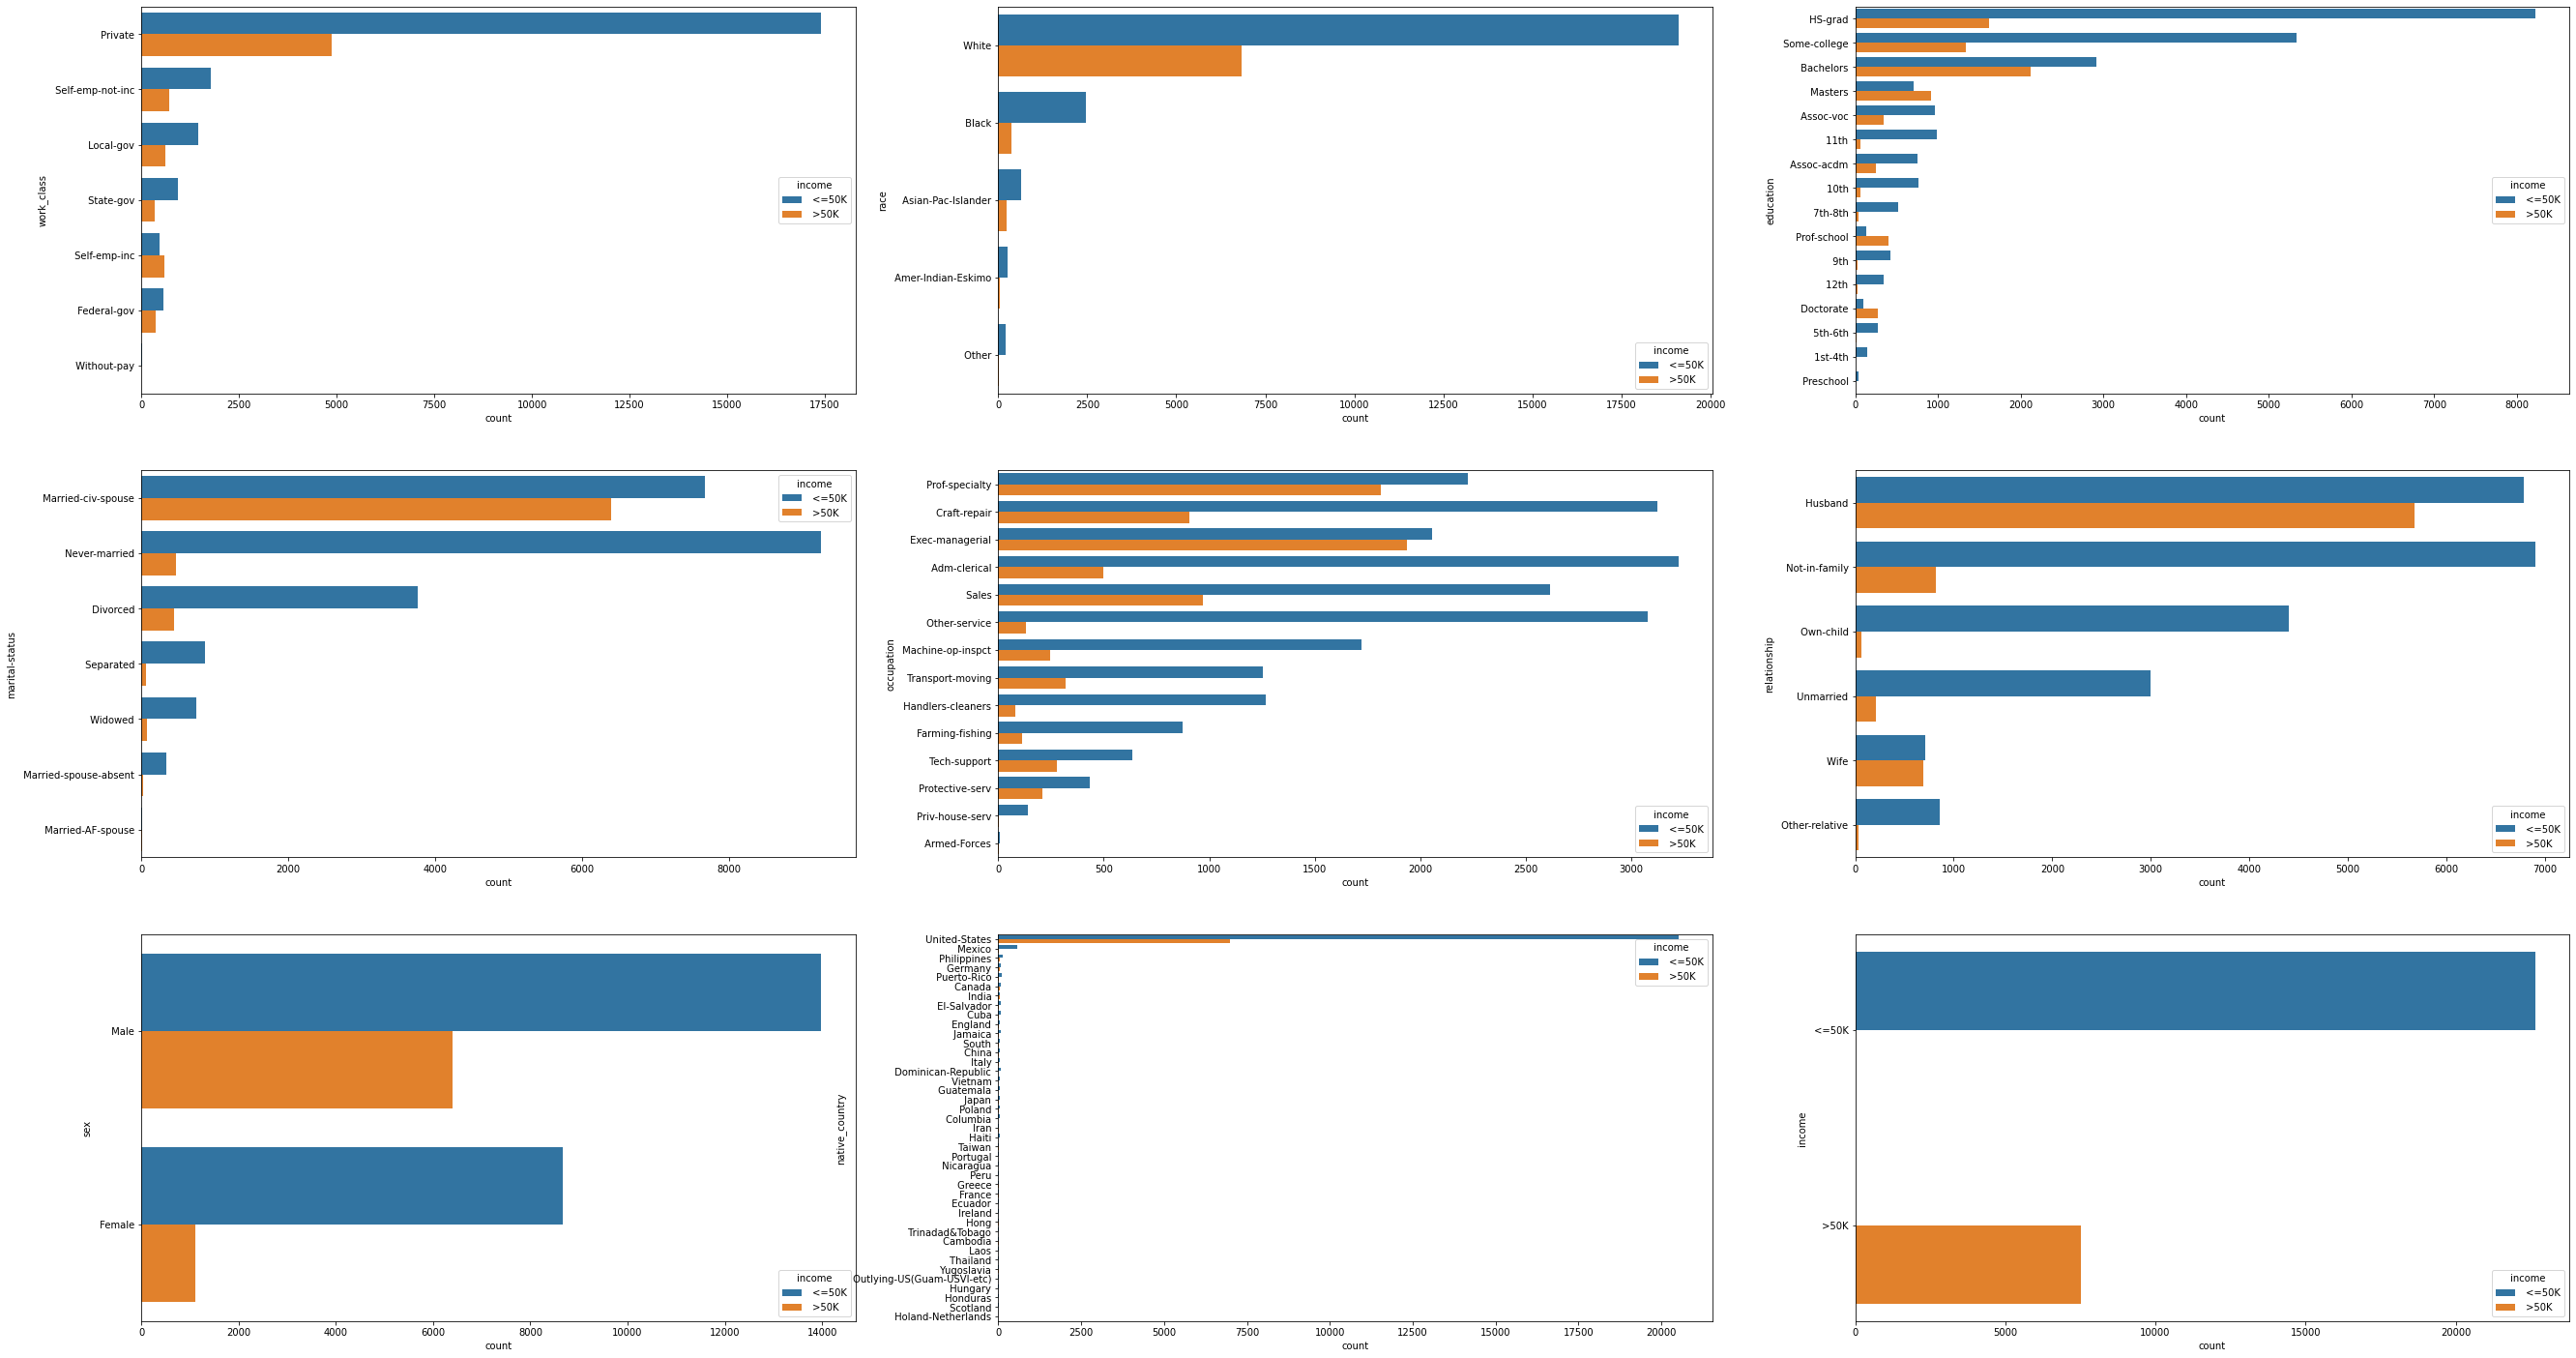

In [11]:
#sns.distplot(data.education.value_counts())
#sns.jointplot(x="education_num", y="age", data=data, kind="kde");
category_col =['work_class', 'race', 'education','marital-status', 'occupation',
               'relationship', 'sex', 'native_country', 'income'] 


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(45,25))
#fig.tight_layout()
[sns.countplot(y=feature, hue='income', data=train, order=train[feature].value_counts().index , ax=axs.flatten()[idx]) for idx, feature in enumerate(category_col)]
#[axs.flatten()[idx].set_title(feature) for idx, feature in enumerate(to_count)]
plt.plot()

## Income of the employee based on the qualification

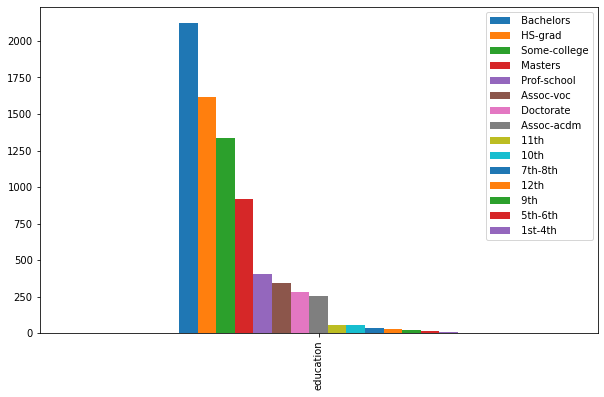

In [12]:
c = train[train['income'] == ' >50K']['education'].value_counts()
df = pd.DataFrame([c])
df.plot(kind='bar',figsize=(10,6))

## Income of the employee based on the marital status

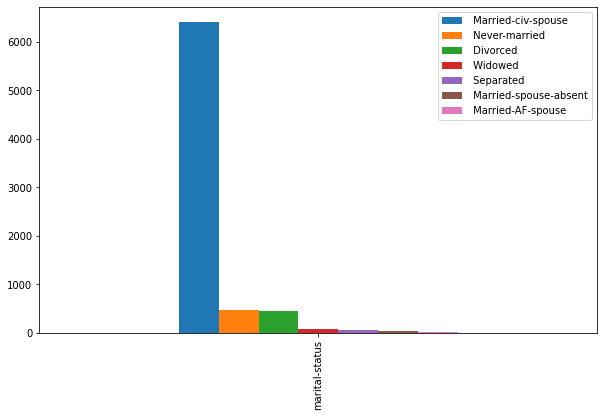

In [13]:
c = train[train['income'] == ' >50K']['marital-status'].value_counts()
df = pd.DataFrame([c])
df.plot(kind='bar',figsize=(10,6))

## Income of the employee based on the occupation

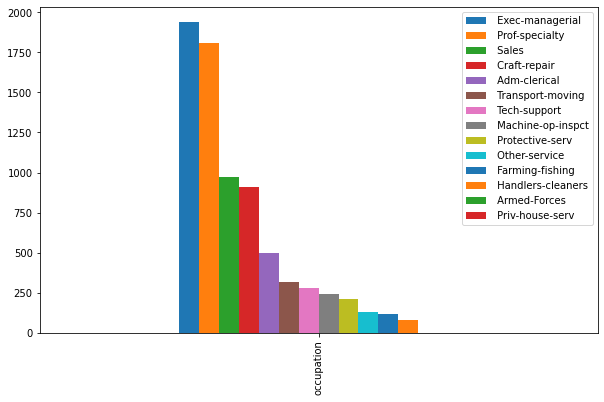

In [14]:
c = train[train['income'] == ' >50K']['occupation'].value_counts()
df = pd.DataFrame([c])
df.plot(kind='bar',figsize=(10,6))

## Income of the employee based on the race

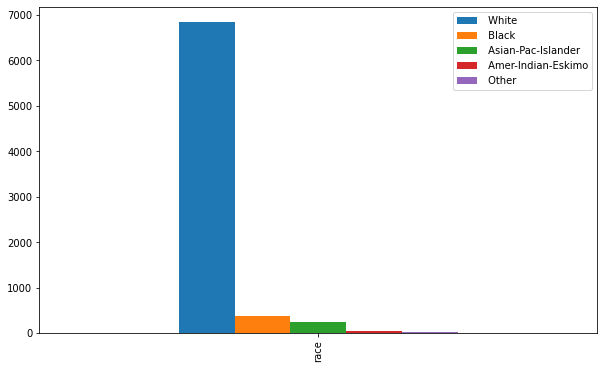

In [15]:
c = train[train['income'] == ' >50K']['race'].value_counts()
df = pd.DataFrame([c])
df.plot(kind='bar',figsize=(10,6))

## Income of the employee based on the work class

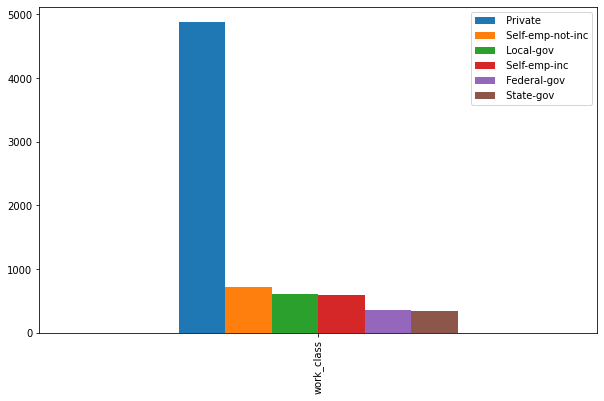

In [16]:
c = train[train['income'] == ' >50K']['work_class'].value_counts()
df = pd.DataFrame([c])
df.plot(kind='bar',figsize=(10,6))

## Income of the employee based on the relationship

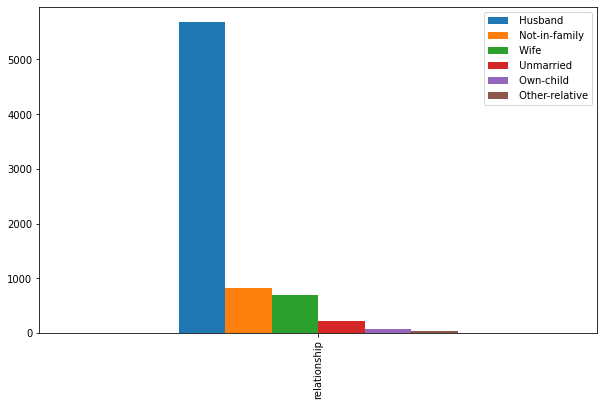

In [17]:
c = train[train['income'] == ' >50K']['relationship'].value_counts()
df = pd.DataFrame([c])
df.plot(kind='bar',figsize=(10,6))

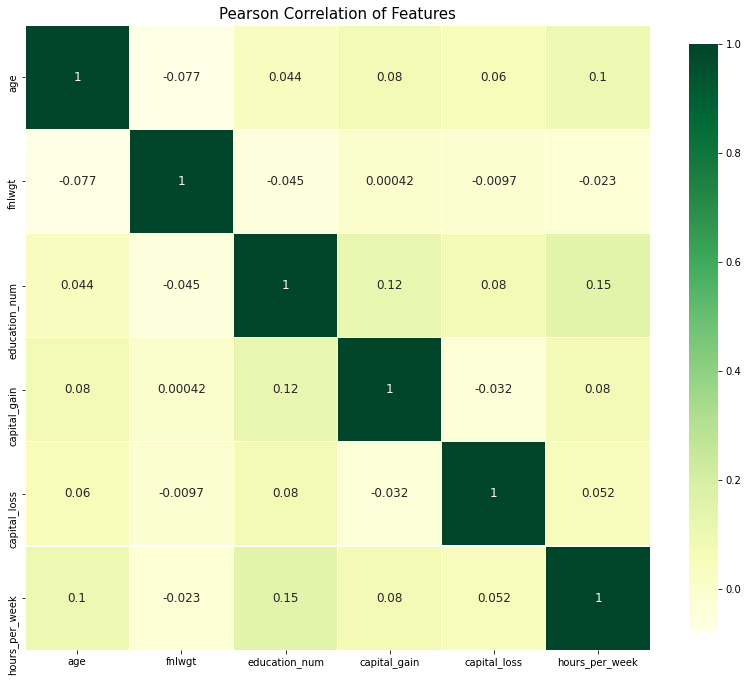

In [18]:
#correlation heatmap of dataset

#took this code sample from another kernel on this site
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

## Label Encoding

In [19]:
enc=LabelEncoder()
train['race']=enc.fit_transform(train['race'])
train['sex']=enc.fit_transform(train['sex'])
train['relationship']=enc.fit_transform(train['relationship'])
train['occupation']=enc.fit_transform(train['occupation'])
train['marital-status']=enc.fit_transform(train['marital-status'])
train['native_country']=enc.fit_transform(train['native_country'])
train['income']=enc.fit_transform(train['income'])
train['work_class']=enc.fit_transform(train['work_class'])

## Feature Selection

In [20]:
data = train.drop(['education', 'fnlwgt'], axis = 1)

In [21]:
data.head(10)

,age,work_class,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,13,2,3,0,4,1,0,0,13,38,0
2,38,2,9,0,5,1,4,1,0,0,40,38,0
3,53,2,7,2,5,0,2,1,0,0,40,38,0
4,28,2,13,2,9,5,2,0,0,0,40,4,0
5,37,2,14,2,3,5,4,0,0,0,40,38,0
6,49,2,5,3,7,1,2,0,0,0,16,22,0
7,52,4,9,2,3,0,4,1,0,0,45,38,1
8,31,2,14,4,9,1,4,0,14084,0,50,38,1
9,42,2,13,2,3,0,4,1,5178,0,40,38,1


In [22]:
result = data.income
data.drop('income', 1, inplace=True)

In [23]:
train_x , test_x , train_y , test_y = train_test_split( data , result , train_size = .7 , test_size = .3 )

## K-Nearest Neighbours

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
predicted_knn = knn.predict(test_x)
acc_knn = (accuracy_score(test_y, predicted_knn)) * 100
acc_knn

print("Accuracy: %s%%" % (100*accuracy_score(test_y, predicted_knn)))
print(confusion_matrix(test_y, predicted_knn))
print(classification_report(test_y, predicted_knn))

Accuracy: 83.73300917228423%
[[6131  634]
 [ 838 1446]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6765
           1       0.70      0.63      0.66      2284

    accuracy                           0.84      9049
   macro avg       0.79      0.77      0.78      9049
weighted avg       0.83      0.84      0.83      9049



## Random Forest

In [25]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_x, train_y)
predicted_rf = rf.predict(test_x)
acc_rf = (accuracy_score(test_y, predicted_rf)) * 100
acc_rf

print("Accuracy: %s%%" % (100*accuracy_score(test_y, predicted_rf)))
print(confusion_matrix(test_y, predicted_rf))
print(classification_report(test_y, predicted_rf))


Accuracy: 84.8712564924301%
[[6225  540]
 [ 829 1455]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6765
           1       0.73      0.64      0.68      2284

    accuracy                           0.85      9049
   macro avg       0.81      0.78      0.79      9049
weighted avg       0.84      0.85      0.85      9049



## Support vector machine

In [26]:
svc = SVC()
svc.fit(train_x, train_y)
predicted_svc = svc.predict(test_x)
acc_svc = (accuracy_score(test_y, predicted_svc)) * 100
acc_svc

print("Accuracy: %s%%" % (100*accuracy_score(test_y, predicted_svc)))
print(confusion_matrix(test_y, predicted_svc))
print(classification_report(test_y, predicted_svc))





Accuracy: 79.40103878881645%
[[6552  213]
 [1651  633]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6765
           1       0.75      0.28      0.40      2284

    accuracy                           0.79      9049
   macro avg       0.77      0.62      0.64      9049
weighted avg       0.79      0.79      0.76      9049



## Gradient Boosting

In [27]:
gbc = GradientBoostingClassifier()
gbc.fit(train_x, train_y)
predicted_gbc = gbc.predict(test_x)
acc_gbc = (accuracy_score(test_y, predicted_gbc)) * 100
acc_gbc

print("Accuracy: %s%%" % (100*accuracy_score(test_y, predicted_gbc)))
print(confusion_matrix(test_y, predicted_gbc))
print(classification_report(test_y, predicted_gbc))

Accuracy: 85.43485468007515%
[[6369  396]
 [ 922 1362]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6765
           1       0.77      0.60      0.67      2284

    accuracy                           0.85      9049
   macro avg       0.82      0.77      0.79      9049
weighted avg       0.85      0.85      0.85      9049



## Ada Boosting

In [28]:
abc = AdaBoostClassifier()
abc.fit(train_x, train_y)
predicted_abc = abc.predict(test_x)
acc_abc = (accuracy_score(test_y, predicted_abc)) * 100
acc_abc

print("Accuracy: %s%%" % (100*accuracy_score(test_y, predicted_abc)))
print(confusion_matrix(test_y, predicted_abc))
print(classification_report(test_y, predicted_abc))

Accuracy: 85.14753011382473%
[[6297  468]
 [ 876 1408]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6765
           1       0.75      0.62      0.68      2284

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.85      0.85      0.85      9049



## Model Evaluation and Accuracy

In [29]:
models = pd.DataFrame({
'Model': ['Support Vector Machines', 'Random Forest','K-Nearest Neighbours', 'Gradient Boosting', 'Ada Boost'
],
'Score': [acc_svc,acc_rf, acc_knn, acc_gbc,acc_abc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Gradient Boosting,85.434855
4,Ada Boost,85.147530
1,Random Forest,84.871256
2,K-Nearest Neighbours,83.733009
0,Support Vector Machines,79.401039
